# COGS 108 - Final Project

## Overview

For over the past century, the film industry has seen tremendous growth from its early films without sound to today’s large scale blockbusters such as the <i>Marvel's Avengers</i> film series. As of 2018, the global movie box office is now worth a total 41.7 billion USD and when combined with home entertainment, is worth a massive 136 billion USD (1). While the industry has seen drastic growth, the film industry lately has seen stiff competition from social media, online streaming and other forms of entertainment. To stay competitive and continue to attract audiences to theaters, these large film production companies are turning to big data to predict and analyze potential films that they believe will be a success. For this project, through data analysis, we will explore what key factors contribute to a film being overall economically successful in Hollywood box office.

## Names

- Chris Synnott 
- Thanh Quach 
- Alex Yuen 
- Yanjia Chen
- Calvin Nguy

## Research Question

What are the key factors that contribute to a film's box office revenue and financial success?

Using data sets that contain a variety of information and statistics on over 10,000 movies released as far back as the 1940's to 2016, our team's goal is to ascertain which factors were key in determining whether or not a movie would be successful monetarily. These factors, as outlined above, include director, production company, time of release, award nominations and wins, genre and actors/actresses. Using these statistics, we will gauge success as total revenue accumulated from the movie.

## Background and Prior Work

After most of us in our group saw the massive success of Marvel’s Avengers: Endgame this year, we quickly realized that we are genuinely interested in learning about what makes a film successful. With the use of our programming and data analysis knowledge, we set out to find a better understanding of this question as it relates to this huge industry. For many, including ourselves, there is a common intuition that only film’s with large production budgets and marketing campaigns will ever see any sight of financial success. We hope to explore this further to conclude if this is actually the case or if there are actually other surprising key factors that drives a film’s to produce higher revenue. 

We looked at a variety of sources, from online statistics to independent case studies, and collected the important factors that all of the sources have in common to generate our hypotheses. Since there are a lot of factors that go into a movie’s success, we want to set aside the insignificant ones and only focus ones that really drive revenue. This allows us to explore deeper into the key factors that have a strong positive effect on revenue.

References (include links):

- 1) https://www.kaggle.com/deepak525/investigate-tmdb-movie-dataset
    - For this data project, we found the findings and strategy to be very interesting. The author analyzed the overall history and analytics of the film industry over the past century. While most of the findings and analysis was based on general overview of Hollywood film attributes and numbers, our project focuses more on the revenue aspect of films. It was interesting to see the project’s findings on the strong correlation between budget and revenue. These findings influenced our thoughts in our hypothesis in terms of budget and revenue.
- 2) https://dumas.ccsd.cnrs.fr/dumas-00909948/document
    - This case study was interesting to our group because it was a lot more formal and academic, compared to many personal data science projects that we had previously researched. It gave us some important insights to what drive revenue.

## Hypothesis

For our hypothesis we have a number of predictions based off of our previous knowledge and background research. To begin, we hypothesize that there will be generally a strong correlation between higher budgets and higher revenues for films. Next, we predict that movies with many Academy Award wins and nominations will generally see higher revenues due to their critical acclaim and extra publicity during Oscar season. We also believe that the best time to release a movie is over the summer when people generally have more time to go to the theaters. All other film attributes, we believe, will generally not play a crucial part in a film’s revenue. It will be very intriguing to see the results of this analysis to see whether our predictions (some of which are common beliefs) were correct or not.

## Dataset(s)

Since there will be multiple factors that we are going to analyze, we have to combine our multiple datasets into one main dataset that contains all of the information that we need. This will be achieved via merging all datasets with the common ‘title’ and/or movie ‘id’ fields (provided in datasets from on Tmdb). Following this merging, we will then rearrange columns, rows and drop unnecessary/empty data.

- 1.) TMDB 5,000 Movie Dataset
    - Link to dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata
    - Size of dataset: 5000+ observations
    - Description: Vast details on films ranging from type of genre, release dates and revenue. This dataset also includes another file with the movie credit data for each movie, which includes data on character names and their corresponding actors and actresses, performer gender, and other important behind the scenes crew members and directors of the film.
    - Used Fields: title, id, budget, revenue, genre, release_date, production_company and vote_avg
    
- 2.) All Academy Awards Winners
    - Link to dataset: https://datahub.io/rufuspollock/oscars-nominees-and-winners
    - Size of dataset: 11,000+ observations
    - Description: All Oscar winners from 1927 to the present. This data set contains every award and nominee for every category in the Oscars. This will help us better understand one measure of success of each film.
    - Used Fields: title, Best Picture, Best Actor/Actress
    
- 3.) IMDB 5,000 Movie Dataset
    - Link to dataset: https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset
    - Size of dataset: 5000+ observations
    - Description: The dataset is from Kaggle website. It contains 28 variables for 5043 movies, spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. “imdb_score” is the response variable while the other 27 variables are possible predictors (source: https://www.kaggle.com/carolzhangdc/predict-imdb-score-with-data-mining-algorithms).
    - Used Fields: title, imdb_score, actors, genres, budget, year_release
    
- 4.) TMDB 10,000 Movie Dataset
    - Link to dataset: https://www.kaggle.com/juzershakir/tmdb-movies-dataset
    - Size of dataset: Data on 10k+ movies from 1960 to 2015.
    - Description: This dataset provides more data points and contains additional unique attributes compared to the TMDB 5,000 above.
    - Used Fields: title, id, cast, genres, vote_count, vote_average, release_date, budget, revenue, imdb_id, production_company, directors


## Setup

- To jumpstart our project, we will load the import statements and utility codes that are essential to our 'data cleaning and analysis' process. We will also define a few functions here that we thought might be helpful for later tasks.

In [35]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import ast

# Configure libraries
sns.set()
sns.set_context('talk')

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 100
pd.set_option('display.max_columns', 100)

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)
pd.set_option('display.width', 100000)

# replace | in strings by ,
def replace_str(str):
    str = str.replace('|', ', ')
    return str

# cast to int
def cast_int(i):
    out = int(i)
    return out

## Data Cleaning

- To create the dataset for analysis and answering our hypotheses, we have to clean and pre-process the datasets provided above:
    - TMDB 5000 Movie Dataset
    - TMDB 10000 Movie Dataset
    - IMDB 5000 Movie Dataset
    - All Academy Award Winners
    
    
- The cleaning and pre-preprocessing for each of these datasets will be specified in details below:

### 1. TMDB 5000 Movie Dataset Cleaning

In [36]:
# tmdb5000 dataset 
tmdb5000 = pd.DataFrame(pd.read_csv('./Datasets/tmdb_5000_movies.csv'))
# drop columns we don't need
tmdb5000 = tmdb5000.drop(['title', 'homepage','original_language','keywords',
                          'original_title','overview','spoken_languages','status',
                          'tagline','production_countries','vote_count'], axis=1)
# create a new temp column, and extract all of the genres into a single list
tmdb5000['genresFormmated'] = [list(set([y['name'] for y in x])) 
                               for x in tmdb5000['genres'].apply(ast.literal_eval)]
tmdb5000['genres'] = tmdb5000['genresFormmated']
# create a new temp column, and extract all of the production companies
# into a single list
tmdb5000['productionCompaniesFormmated'] = [list(set([y['name'] for y in x])) 
        for x in tmdb5000['production_companies'].apply(ast.literal_eval)]
tmdb5000['production_companies'] = tmdb5000['productionCompaniesFormmated']
# update genres column
tmdb5000 = tmdb5000.drop(['genresFormmated','productionCompaniesFormmated'], axis=1)
# reorder columns
tmdb5000 = tmdb5000[['budget', 'revenue', 'genres', 'release_date', 'id',
                     'production_companies', 'runtime', 'popularity', 'vote_average']]
print(tmdb5000.shape)
tmdb5000.head(2)

(4803, 9)


,budget,revenue,genres,release_date,id,production_companies,runtime,popularity,vote_average
0,237000000,2787965087,"[Fantasy, Science Fiction, Action, Adventure]",2009-12-10,19995,"[Ingenious Film Partners, Twentieth Century Fo...",162.0,150.44,7.2
1,300000000,961000000,"[Fantasy, Action, Adventure]",2007-05-19,285,"[Walt Disney Pictures, Second Mate Productions...",169.0,139.08,6.9


### 2. Academy Awards Dataset Cleaning

In [37]:
# Academy awards dataset
oscars_df = pd.DataFrame(pd.read_csv('./Datasets/oscars.csv'))
# get all best picture oscar winners
oscars_df = oscars_df.loc[((oscars_df['category'] == "BEST MOTION PICTURE") | 
        (oscars_df['category'] == "BEST PICTURE")) & (oscars_df['winner'] == True)]
# rename column to 'title' for merge
oscars_df = oscars_df.rename({'entity':'title','winner':'oscar_best_picture'}, axis=1)
oscars_df = oscars_df.drop(['year','category'], axis=1)
oscars_df['title'] = oscars_df['title'].str.strip()

print(oscars_df.shape)
oscars_df.head(2)

(74, 2)


,oscar_best_picture,title
1823,True,Going My Way
1992,True,The Lost Weekend


### 3. IMDB 5000 Dataset Cleaning

In [38]:
imdb5000 = pd.DataFrame(pd.read_csv('./Datasets/movie_metadata.csv'))

# drop missing columns
imdb5000 = imdb5000.dropna()

# combining all actor columns into 1 list
name1 = 'actor_1_name'
name2 = 'actor_2_name'
name3 = 'actor_3_name'
imdb5000['actors'] = imdb5000[[name1,name2,name3]].values.tolist()

# drop unnecessary columns
imdb5000 = imdb5000.drop(labels=['director_name', 'language', 'content_rating', 
                                 'plot_keywords', 'movie_imdb_link', 
                          'color','director_facebook_likes', 'actor_3_facebook_likes', 
                                 'actor_2_facebook_likes',
                          'actor_1_facebook_likes', 'facenumber_in_poster', 
                                 'aspect_ratio', 'movie_facebook_likes',
                          'cast_total_facebook_likes', 'actor_1_name', 
                                 'actor_2_name', 'actor_3_name'], axis=1)

# renaming the columns for cleaner read
imdb5000.rename(columns={'num_critic_for_reviews':'critic_reviews', 
                         'movie_title':'title',
                         'num_voted_users':'user_upvotes', 
                         'num_user_for_reviews':'user_reviews', 
                         'title_year':'year_release'}, inplace=True)

# rearranging columns
imdb5000 = imdb5000[['title', 'country', 'actors', 'imdb_score', 'critic_reviews', 
                     'user_reviews', 'user_upvotes',
                     'genres', 'duration', 'year_release', 'budget', 'gross']]

imdb5000['genres'] = imdb5000['genres'].apply(replace_str)
imdb5000['budget'] = imdb5000['budget'].apply(cast_int)
imdb5000['gross'] = imdb5000['gross'].apply(cast_int)
imdb5000['duration'] = imdb5000['duration'].apply(cast_int)
imdb5000['year_release'] = imdb5000['year_release'].apply(cast_int)
imdb5000['critic_reviews'] = imdb5000['critic_reviews'].apply(cast_int)
imdb5000['user_reviews'] = imdb5000['user_reviews'].apply(cast_int)
imdb5000.rename(columns={'gross':'gross_usa'}, inplace=True)

imdb5000['title'] = imdb5000['title'].str.strip()
print(imdb5000.shape)
imdb5000.head(1)

(3756, 12)


,title,country,actors,imdb_score,critic_reviews,user_reviews,user_upvotes,genres,duration,year_release,budget,gross_usa
0,Avatar,USA,"[CCH Pounder, Joel David Moore, Wes Studi]",7.9,723,3054,886204,"Action, Adventure, Fantasy, Sci-Fi",178,2009,237000000,760505847


### 4. TMDB 10000 Dataset Cleaning

In [39]:
tmdb10k = pd.DataFrame(pd.read_csv('./Datasets/tmdb_movies_data.csv'))

# drop unnecessary columns
tmdb10k = tmdb10k.drop(labels=['homepage', 'tagline', 'keywords', 
                               'overview', 'release_year'], axis=1)

# drop all NaN
tmdb10k = tmdb10k.dropna()

# renaming the columns for cleaner read
tmdb10k.rename(columns={'original_title':'title'}, inplace=True)

#rearranging columns
tmdb10k = tmdb10k[['id', 'imdb_id', 'title', 'director', 'production_companies', 
                   'cast', 'genres', 'popularity', 
                   'vote_count', 'vote_average', 'release_date', 
                   'runtime', 'budget', 'budget_adj', 'revenue', 
                   'revenue_adj']]

# formatting columns' values
tmdb10k['production_companies'] = tmdb10k['production_companies'].apply(replace_str)
tmdb10k['cast'] = tmdb10k['cast'].apply(replace_str)
tmdb10k['genres'] = tmdb10k['genres'].apply(replace_str)

# cast to int
tmdb10k['budget_adj'] = tmdb10k['budget_adj'].apply(cast_int)
tmdb10k['revenue_adj'] = tmdb10k['revenue_adj'].apply(cast_int)

tmdb10k['title'] = tmdb10k['title'].str.strip()
print(tmdb10k.shape)
tmdb10k.head(1)


(9771, 16)


,id,imdb_id,title,director,production_companies,cast,genres,popularity,vote_count,vote_average,release_date,runtime,budget,budget_adj,revenue,revenue_adj
0,135397,tt0369610,Jurassic World,Colin Trevorrow,"Universal Studios, Amblin Entertainment, Legen...","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...","Action, Adventure, Science Fiction, Thriller",32.99,5562,6.5,6/9/2015,124,150000000,137999939,1513528810,1392445893


### 5. Merge/Combine All Datasets into Master Dataframe

In [40]:
# merge tmdb10k and oscars_df into movie_df
movie_df = pd.merge(tmdb10k, oscars_df, on=['title'], how='left')

#merge movie_df and imdb5000 into movie_df
movie_df = pd.merge(movie_df, imdb5000, on=['title'], how='left', suffixes=('', '_y'))
movie_df = movie_df.drop(labels='actors', axis=1)

#merge movie_df and tmdb5000 into movie_df
movie_df = pd.merge(movie_df, tmdb5000, on=['id'], how='left', suffixes=('', '_y'))
movie_df = movie_df.drop(movie_df.filter(regex='_y').columns, axis=1)

print(movie_df.shape)
movie_df.head(1)

(9910, 25)


,id,imdb_id,title,director,production_companies,cast,genres,popularity,vote_count,vote_average,release_date,runtime,budget,budget_adj,revenue,revenue_adj,oscar_best_picture,country,imdb_score,critic_reviews,user_reviews,user_upvotes,duration,year_release,gross_usa
0,135397,tt0369610,Jurassic World,Colin Trevorrow,"Universal Studios, Amblin Entertainment, Legen...","Chris Pratt, Bryce Dallas Howard, Irrfan Khan,...","Action, Adventure, Science Fiction, Thriller",32.99,5562,6.5,6/9/2015,124,150000000,137999939,1513528810,1392445893,NaN,USA,7.0,644.0,1290.0,418214.0,124.0,2015.0,6.52e+08


## Data Analysis & Results

### Genres vs. Revenue

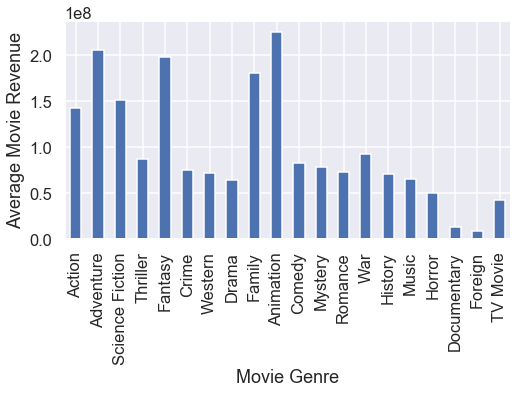

In [41]:
#make copy of df
genre_df = movie_df
#get needed columns
genre_df = genre_df[['title','genres','revenue']]
#drop all revenue == 0
genre_df = genre_df[genre_df.revenue != 0]
#drop all nan in genres and revenue columns
genre_df = genre_df.dropna(axis=0, subset=['genres','revenue'])
genre_set = []
#get all genres, add to list
for index, row in genre_df.iterrows():
    genre_list = row['genres'].split(",")
    for g in genre_list:
        genre_set.append(g.strip())
        
#convert to unique values only
set(genre_set)
#create new columns from the genre set
for newGenre in genre_set:
    genre_df[newGenre] = np.nan
    
#update columns with revenue for that movie
for index, row in genre_df.iterrows():
    genre_list = row['genres'].split(",")
    for g in genre_list:
        genre_df.loc[index,g.strip()] = row['revenue']
#drop excess columns
genre_df = genre_df.drop(['title', 'genres','revenue'], axis=1)

#graph plot of genre vs revenue, don't include nan's
genre_df.mean(skipna=True).plot(kind='bar')
plt.xlabel('Movie Genre')
plt.ylabel('Average Movie Revenue')
fig = plt.gcf()
fig.set_size_inches(8,4)
plt.show()

- This graph show the average revenue for each genre in our combined dataset. We can observe that Documentary, Foreign Movie are amongst the lowest revenue maker. Adventure, Fantasy and Animation are amongst the highest. Animation genre generated well above 200 millions USD in average revenue; with Adventure and Fantasy comes second and third, in turns generated a little over and under 200 millions USD. Thus, it is clear to us that these 3 genres have the highest effect on revenue compared to the rest.

### Time of Year (week) vs. Revenue

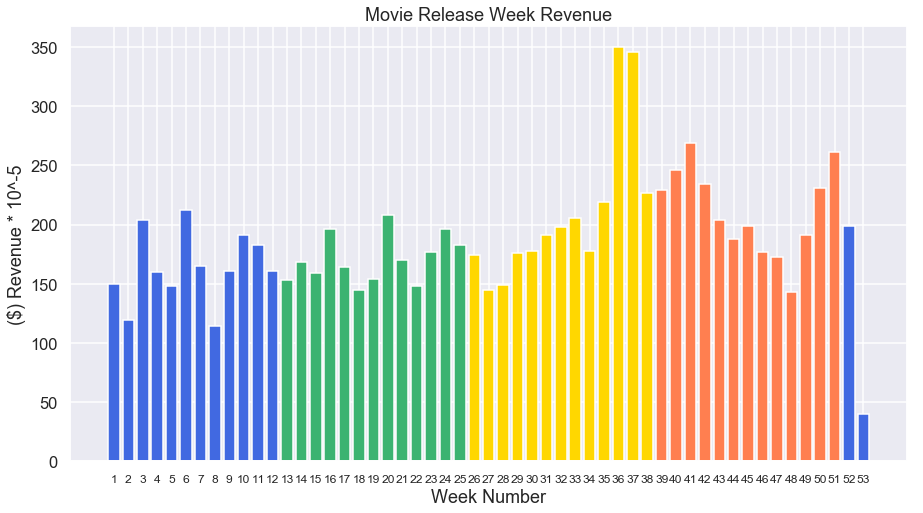

In [42]:
movie_df_copy = movie_df

# Drop un-needed column categories
movie_df_copy = movie_df_copy.drop(['id', 'imdb_id', 'production_companies',
                                    'cast', 'popularity', 
                                    'vote_count', 'vote_average', 'runtime',
                                    'oscar_best_picture', 
                                    'imdb_score', 'critic_reviews'
                                    , 'user_reviews', 'user_upvotes', 
                                    'duration', 'gross_usa', 'country',
                                    'director'], axis=1)

# Drop columns with null values for release date
release_df = movie_df_copy[pd.notnull(movie_df_copy['release_date'])]

# Parse release_date data into release_week
def parse_weeks(str):
    time = datetime.datetime.strptime(str, '%m/%d/%Y')
    time = time.date()
    return time.isocalendar()[1]

# Apply parse_weeks to release dates in our DataFrame. Now we have a
# column that contains information on which week number a movie was released
release_df['release_week'] = release_df['release_date'].apply(parse_weeks)

# Create lists for release week and revenue
release_dict = {}
r_week = []
r_week_count = []

for index, row in release_df.iterrows():
    week = row['release_week']
    if week in release_dict:
        release_dict[week] += 1
    else:
        release_dict[week] = 1
        
for key in sorted(release_dict.keys()):
    r_week.append(key)
    r_week_count.append(release_dict[key])
    
# Bar graph of release week vs revenue
week_label = r_week
season_colors = ['royalblue', 'royalblue', 'royalblue', 'royalblue', 
                 'royalblue', 'royalblue', 'royalblue', 
                 'royalblue', 'royalblue', 'royalblue', 'royalblue', 
                 'royalblue', 'mediumseagreen', 'mediumseagreen', 
                 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
                 'mediumseagreen', 'mediumseagreen', 
                 'mediumseagreen', 'mediumseagreen', 'mediumseagreen', 
                 'mediumseagreen', 'mediumseagreen', 
                 'mediumseagreen', 'gold', 'gold', 'gold', 'gold', 'gold',
                 'gold', 'gold', 'gold', 'gold', 'gold', 
                 'gold', 'gold', 'gold', 'coral', 'coral', 
                 'coral', 'coral', 'coral', 'coral', 'coral', 
                 'coral', 'coral', 'coral', 'coral', 'coral', 'coral',
                 'royalblue', 'royalblue']
revenue_label = r_week_count
y_pos = np.arange(len(r_week))
plt.bar(y_pos, revenue_label, tick_label = week_label, 
        width = 0.8, color=season_colors)
plt.xticks(y_pos,week_label,rotation=0,fontsize=12)
plt.ylabel('($) Revenue * 10^-5')
plt.xlabel('Week Number')
plt.title("Movie Release Week Revenue")
fig = plt.gcf()
fig.set_size_inches(15,8)

plt.show()

- Looking at this graph, we can clearly observe the movies that are released in weeks 26-51 tends to see higher revenue than movies released in Week 1-25, 52, 53 in comparision. Surprisingly, Week 36 and 37 generates the most revenue out of the 52 weeks in a year. This somewhat contradicts our initial prediction, where we thought that Holiday season (around December - Week 49, 50, 51) must have been the busiest time thus generate the most revenue. We can also see that starting from Week 35, the revenue trend is increasing up until Week 41 (early September - mid October), then starts to decline from Week 42 to Week 48. However, the revenue picks up again in Week 49-51 (early - mid December).


- This suggests that movies released during a specific time of year (Week 35-41, 50, 51) will have a strong effect on revenue compared to the movies that are released outside of this timespan.

### Top Actor/Director vs.  Revenue

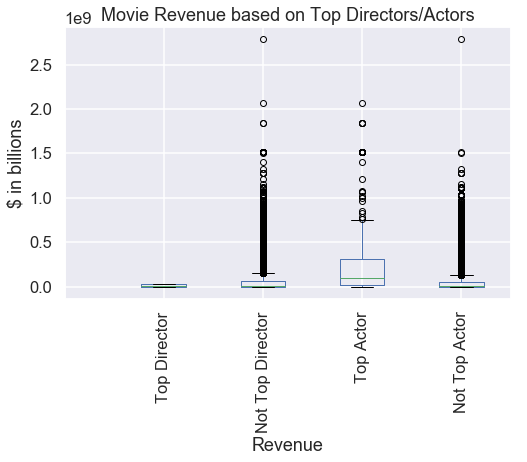

In [43]:
tocopy_df = movie_df
tocopy_df['cast'] = tocopy_df.cast.apply(lambda x: x[0:-1].split(','))
tocopy_df['director'] = tocopy_df.director.apply(lambda x: x[0:-1].split('|'))

topdiract_df = tocopy_df
diract = pd.DataFrame(pd.read_csv('./Datasets/top_director_actor.csv'))

# create a new dict with values = list()
topdir = diract['director_name'].tolist()
topact = diract['actor_name'].tolist()
# create new col for whether movie has a top actor/director
topdiract_df['top_director'] = 0
topdiract_df['top_actor'] = 0
# increment if movie has top actor/director 
for index, row in topdiract_df.iterrows():
    directors = row['director']
    actors = row['cast']
    for x in directors:
        if x in topdir:
            topdiract_df.loc[index, 'top_director'] = topdiract_df.loc[index,
                                                        'top_director'] + 1
    for y in actors:
        if y in topact:
            topdiract_df.loc[index, 'top_actor'] = topdiract_df.loc[index, 
                                                        'top_actor'] + 1
# create new df and cleaning
dir_yes = topdiract_df.loc[(topdiract_df['top_director'] != 0)]
dir_no = topdiract_df.loc[(topdiract_df['top_director'] == 0)]
act_yes = topdiract_df.loc[(topdiract_df['top_actor'] != 0)]
act_no = topdiract_df.loc[(topdiract_df['top_actor'] == 0)]

dir_yes = dir_yes[['title', 'revenue']]
dir_yes = dir_yes.rename({'revenue': 'dir_yes'}, axis=1)
dir_no = dir_no[['title', 'revenue']]
dir_no = dir_no.rename({'revenue': 'dir_no'}, axis=1)

act_yes = act_yes[['title', 'revenue']]
act_yes = act_yes.rename({'revenue': 'act_yes'}, axis=1)
act_no = act_no[['title', 'revenue']]
act_no = act_no.rename({'revenue': 'act_no'}, axis=1)
# merge df's
top_df2 = topdiract_df
top_df2 = top_df2[['title']]
ddf1 = pd.merge(top_df2, dir_yes, on=['title'], how='left')
ddf2 = pd.merge(ddf1, dir_no, on=['title'], how='left')
ddf3 = pd.merge(ddf2, act_yes, on=['title'], how='left')
ddf4 = pd.merge(ddf3, act_no, on=['title'], how='left')
# graph box plot
ddf4.boxplot(column=['dir_yes', 'dir_no', 'act_yes', 'act_no'])
plt.xlabel('Revenue')
plt.ylabel('$ in billions')
plt.xticks(np.arange(5), ('', 'Top Director', 'Not Top Director',
                          'Top Actor', 'Not Top Actor'))
plt.xticks(rotation='vertical')
plt.title('Movie Revenue based on Top Directors/Actors')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- For this section, we look at the effect of Top Director and Top Actor (based on IMDB ratings) on revenue. Based on the result of the boxplot, we can observe that the category 'Not Top Director', which means films with no top director, generate much higher revenue than the category 'Top Director'. Therefore, we conclude that Top Director would have no effect on revenue.

- On the other hand, the category 'Top Actor', which means films with top actor(s), does better in revenue compared to the 'Not Top Actor' category given the information of their boxplots. Thus, we conclude that Top Actor does in fact have an effect on revenue.

### Academy Award for Best Actors/Actresses (Winners/Nominees) vs. Revenue

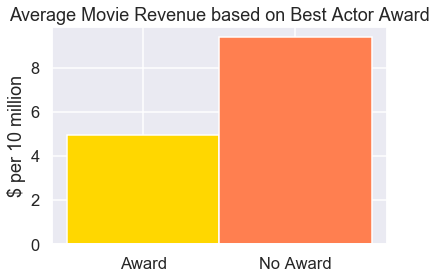

In [44]:
# create a copy of movie_df and oscars_df
copy_df = tocopy_df
osc_df = pd.DataFrame(pd.read_csv('./Datasets/oscars.csv'))

# collect winners/nominees in actor/actress category
osc_df = osc_df.loc[((osc_df['category'] == "ACTOR") |
                     (osc_df['category'] == "ACTRESS"))]

osc_df = osc_df.rename({'entity':'cast'}, axis=1)

# create 2 new columns in the dataframe for best actor/actress won and nominated
copy_df['total_won'] = 0
copy_df['total_nominated'] = 0

# create a new dict with values = list()
from collections import defaultdict
actors = defaultdict(list)

# populate dict
for index, row in osc_df.iterrows():
    name = osc_df.loc[index, 'cast']
    actors[name] = {'nominated': 0, 'won': 0}

# update total won and nominated for each actor/actress
for index, row in osc_df.iterrows():
    name = osc_df.loc[index, 'cast']
    win = osc_df.loc[index, 'winner']
    if win == False:
        actors[name]['nominated'] = actors[name]['nominated'] + 1
    elif win == True:
        actors[name]['won'] = actors[name]['won'] + 1

# assign the values in dict to the dataframe
for index, row in copy_df.iterrows():
    names = copy_df.loc[index, 'cast']
    for i in names:
        if i in actors:
            copy_df.loc[index, 'total_won'] = actors[i]['won']
            copy_df.loc[index, 'total_nominated'] = actors[i]['nominated']

# create new dataframes
copy_df = copy_df[copy_df.revenue != 0]
win_df = copy_df.loc[(copy_df['total_won'] != 0)]
nowin_df = copy_df.loc[(copy_df['total_won'] == 0)]
win_rev = int(win_df['revenue'].sum(skipna=True)/len(win_df))
nowin_rev = int(nowin_df['revenue'].sum(skipna=True)/len(nowin_df))

# winners graph
ylabels = ['Award', 'No Award']
yrevs = [win_rev/1e7, nowin_rev/1e7]
plt.bar([1, 2], yrevs, tick_label = ylabels, width = 1, color = ['gold', 'coral'])
plt.ylabel('$ per 10 million')
plt.title('Average Movie Revenue based on Best Actor Award')

fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show()

- This graph shows the average revenue of films that have Academy Award winning actor/actress against the films that don't. At first, we thought that films with actor/actress wins an Academy Award would do better compared to films that don't. Looking at the bar chart, we can see that films with no actor/actress wins an Academy Award do better than films that have.

- The generated result contradicts with our initial prediction that films have Academy Award winning actor/actress starred in would do better in revenue. Therefore, this leads us to conclude that the factor 'Academy Award Winner for Best Actor/Actress' has no effect on revenue.

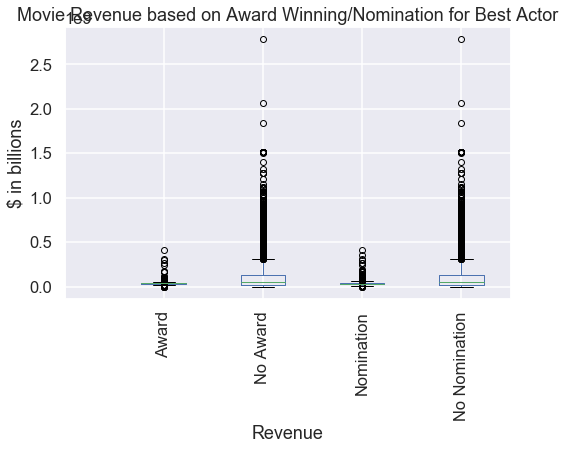

In [45]:
# create new dataframes
nom_df = copy_df.loc[(copy_df['total_nominated'] != 0)]
nonom_df = copy_df.loc[(copy_df['total_nominated'] == 0)]
nom_rev = int(nom_df['revenue'].sum(skipna=True)/len(nom_df))
nonom_rev = int(nonom_df['revenue'].sum(skipna=True)/len(nonom_df))

copy_df2 = copy_df
copy_df2 = copy_df2[['title']]

win_df = win_df[['title', 'revenue']]
win_df = win_df.rename({'revenue': 'win_rev'}, axis=1)
nowin_df = nowin_df[['title', 'revenue']]
nowin_df = nowin_df.rename({'revenue': 'nowin_rev'}, axis=1)

nom_df = nom_df[['title', 'revenue']]
nom_df = nom_df.rename({'revenue': 'nom_rev'}, axis=1)
nonom_df = nonom_df[['title', 'revenue']]
nonom_df = nonom_df.rename({'revenue': 'nonom_rev'}, axis=1)

df1 = pd.merge(copy_df2, win_df, on=['title'], how='left')
df2 = pd.merge(df1, nowin_df, on=['title'], how='left')
df3 = pd.merge(df2, nom_df, on=['title'], how='left')
df4 = pd.merge(df3, nonom_df, on=['title'], how='left')

df4.boxplot(column=['win_rev', 'nowin_rev', 'nom_rev', 'nonom_rev'])
plt.xlabel('Revenue')
plt.ylabel('$ in billions')
plt.xticks(np.arange(5), ('', 'Award', 'No Award', 'Nomination', 'No Nomination'))
plt.xticks(rotation='vertical')
plt.title('Movie Revenue based on Award Winning/Nomination for Best Actor')
fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- This graph is just another visualization to show the connection between Academy Award Winners/Nominees for Best Actors/Actresses and Revenue. This boxplot gives us a clearer look on the effect of Academy Award Winners/Nominees for Best Actors/Actresses on revenue, as it provides more information on revenue (median, max, min, IQR, outliers, etc) from each category.

### Budget vs. Revenue

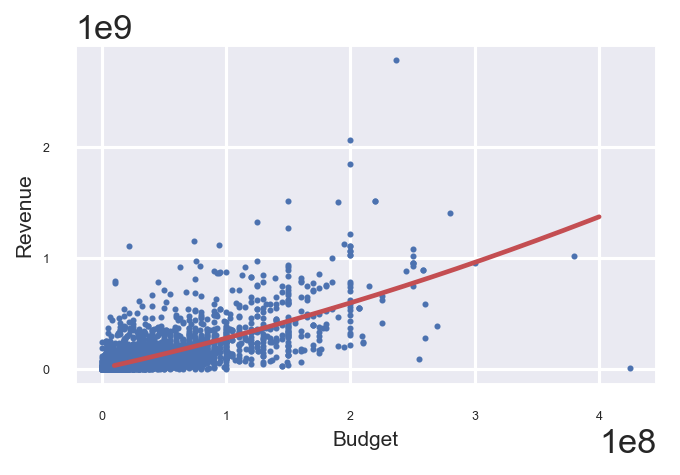

Budget vs. Revenue Correlation:


,budget,revenue
budget,1.00,0.69
revenue,0.69,1.00


In [46]:
#make copy
budget_df = movie_df[['budget','revenue']]
#drop all zero's and nan
budget_df = budget_df[budget_df.budget != 0]
budget_df = budget_df[budget_df.revenue != 0]
budget_df.dropna(axis=0)


a1,b1,c1 = np.polyfit(budget_df['budget'],budget_df['revenue'],2)
budget_1to8 = np.arange(10000000,400000000,500)
# create scatter plot and line
pred_revenue  = a1 *budget_1to8*budget_1to8  + b1*budget_1to8+c1
fig1 = plt.figure(figsize = (2,2),dpi = 150)
plt.scatter(budget_df.budget,budget_df.revenue,s=2)
plt.plot(budget_1to8,pred_revenue,'-r')
plt.xlabel('Budget',fontsize=10)
plt.ylabel('Revenue',fontsize=10)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()
print('Budget vs. Revenue Correlation:')
budget_df.corr()

- As seen in the correlation chart above, there is a semi-strong correlation (.69) between budget and revenue. So movies with a larger budget can somewhat predict to receive larger revenue in return. 

### Production Companies vs. Revenue

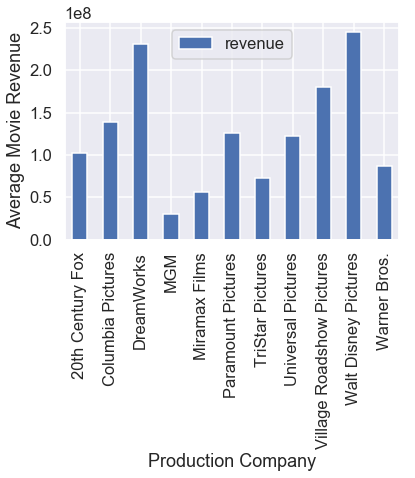

In [47]:
movie_df.revenue =movie_df.revenue.astype(int) 
comp_N_revenu = movie_df[['production_companies','revenue']]

def extract_company(companyName):
    company = companyName[:companyName.find(',')]
    return company
comp_N_revenu = comp_N_revenu[comp_N_revenu['revenue']>1000000]
holder = 'production_companies'
comp_N_revenu[holder] = comp_N_revenu[holder].apply(extract_company)

def standardize_compName(compName):
    compName = compName.lower()
    compName = compName.strip()
    if 'paramount'in compName:
       return 'Paramount Pictures'
    elif 'fox' in compName or 'century' in compName:
       return '20th Century Fox'
    elif 'disney' in compName:
       return 'Walt Disney Pictures'
    elif 'universal' in compName:
       return 'Universal Pictures'
    elif 'columbia' in compName:
       return 'Columbia Pictures'
    elif 'warner' in compName:
       return 'Warner Bros.'
    elif 'newline' in compName:
       return 'New Line Cinema'
    elif 'dreamwork' in compName:
       return 'DreamWorks'
    elif 'village' in compName:
       return 'Village Roadshow Pictures' 
    elif 'tristar' in compName:
       return 'TriStar Pictures'
    elif 'miramax' in compName:
       return 'Miramax Films'
    elif'mayer' in compName or 'MGM' in compName:
       return 'MGM'
    else:
       return np.nan
comp_N_revenu["production_companies"].value_counts()
# standardize compNames
holder = 'production_companies'
for index, row in comp_N_revenu.iterrows():
    comp_N_revenu.loc[index, holder] = standardize_compName(row[holder])
# drop all nans for  [production_companies] columns
comp_N_revenu = comp_N_revenu.dropna(axis=0, subset=['production_companies'])

averages = comp_N_revenu.groupby('production_companies').mean()
averages.plot(kind='bar')
plt.xlabel('Production Company')
plt.ylabel('Average Movie Revenue')

fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show()


- According to the chart, we can see that the average revenue of Disney and Dreamworker is very similar but far higher than other film companies. Interestingly, both companies focus on producing animated films. Our conclusion is that since children (almost all) prefer to watch an animated film and usually need to be accompanied by a parent, this greatly increases the movie's revenue.

### Academy Awards for Best Picture (Winners/Nominees) vs. Revenue

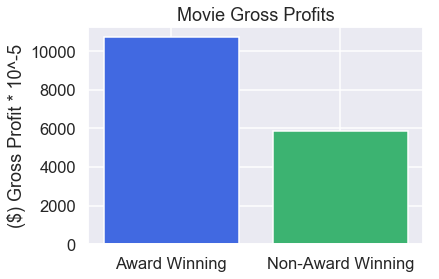

In [48]:
movie_df_copy = movie_df

# Drop un-needed column categories
movie_df_copy = movie_df_copy.drop(['id', 'imdb_id', 
                                    'production_companies', 'country', 
                                    'duration', 'year_release'], axis=1)

# Drop columns with null values for gross_usa profits into new dataframe
profit_df = movie_df_copy[pd.notnull(movie_df_copy['gross_usa'])]

# Seperate award winners vs no award winners into seperate dataframes
award_df = profit_df.loc[profit_df['oscar_best_picture'].notnull()]
no_award_df = profit_df.loc[profit_df['oscar_best_picture'].isnull()]

# Get average gross profits of award winners vs non-award winners
award_gross = int(award_df['gross_usa'].sum() / len(award_df))
no_award_gross = int(no_award_df['gross_usa'].sum() / len(no_award_df))

# Bar graph of award vs non-award movie gross profits
profit_label = ["Award Winning", "Non-Award Winning"]
profit_y = [award_gross/10000, no_award_gross/10000]
plt.bar([1, 2], profit_y, tick_label = profit_label, width = 0.8, 
        color = ['royalblue', 'mediumseagreen'])
plt.ylabel('($) Gross Profit * 10^-5')
plt.title("Movie Gross Profits")

fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show()

- We can see that gross profits of award winning movies is almost twice the amount of non-award winning movies. We can further dive into the data and see how each category of awards contributes to average we calculated.
- One aspect we should take into account is that award winning movies in general may possess a higher budget which would lead to seemingly greater average profits. Here, we will take a closer look at how these movies performed as a whole with their initial budget in mind.



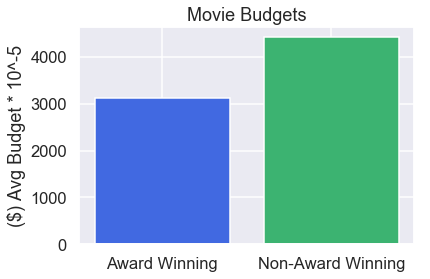

In [49]:
# Removing movies with no budget data
award_budg_df = award_df.loc[profit_df['budget'] != 0]
no_award_budg_df = no_award_df.loc[profit_df['budget'] != 0]

# Get average gross budget of award winners vs non-award winners
award_budg = int(award_budg_df['budget'].sum() / len(award_budg_df))
no_award_budg = int(no_award_budg_df['budget'].sum() / len(no_award_budg_df))

# Bar graph of award vs non-award movie budgets
profit_label = ["Award Winning", "Non-Award Winning"]
profit_y = [award_budg/10000, no_award_budg/10000]
plt.bar([1, 2], profit_y, tick_label = profit_label, width = 0.8,
        color = ['royalblue', 'mediumseagreen'])
plt.ylabel('($) Avg Budget * 10^-5')
plt.title("Movie Budgets")

fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show()

- Looking at the graph above, we can see that having a higher budget does not necessarily lead to movie being more likely to win an Academy Award.

Text(0, 0.5, 'Movie Category')

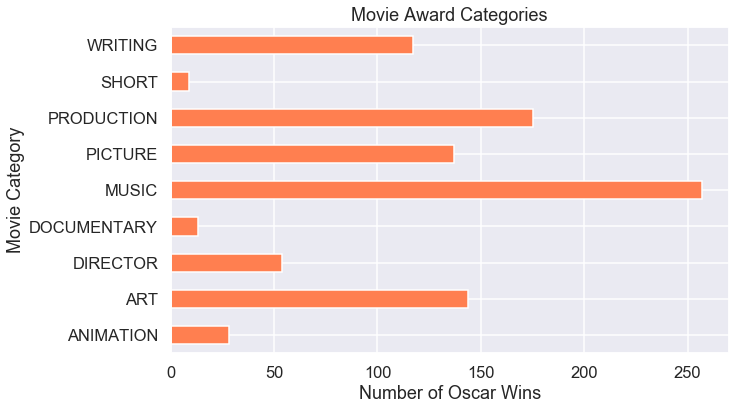

In [50]:
# There are 124 unique award categories, we'll write a function to group 
# similar categories together
def group_awards(string):
    string = string.lower()
    string = string.strip()
    
    if "music" in string:
        output = "MUSIC"
    elif "sound" in string:
        output = "MUSIC"
    elif "actor" in string:
        output = "ACTOR/ACTRESS"
    elif "actress" in string:
        output = "ACTOR/ACTRESS"
    elif "sci" in string:
        output = "SCIENTIFIC"
    elif "anim" in string:
        output = "ANIMATION"
    elif "picture" in string:
        output = "PICTURE"
    elif "cinem" in string:
        output = "PICTURE"
    elif "short" in string:
        output = "SHORT"
    elif "writ" in string:
        output = "WRITING"
    elif "art" in string:
        output = "ART"
    elif "eff" in string:
        output = "ART"
    elif "special" in string:
        output = "HONORARY"
    elif "honor" in string:
        output = "HONORARY"
    elif "prod" in string:
        output = "PRODUCTION"
    elif "edit" in string:
        output = "PRODUCTION"
    elif "makeup" in string:
        output = "PRODUCTION"
    elif "cost" in string:
        output = "PRODUCTION"
    elif "doc" in string:
        output = "DOCUMENTARY"
    elif "dir" in string:
        output = "DIRECTOR"
    else:
        output = np.nan
    
    return output

# Getting all movie award winners into a dataframe
movie_awards_df = pd.DataFrame(pd.read_csv('./Datasets/oscars.csv'))
movie_awards_df = movie_awards_df.rename({'entity':'title'}, axis=1)
movie_awards_df = pd.merge(tmdb10k, movie_awards_df, on=['title'], how='left')
movie_awards_df = pd.merge(movie_awards_df, imdb5000, on=['title'], 
                           how='left', suffixes=('', '_y'))
movie_awards_df = movie_awards_df.loc[movie_awards_df['winner'] == True]

# Drop un-needed columns
movie_awards_df = movie_awards_df.drop(['id', 'imdb_id', 'production_companies',
                                        'cast', 'genres', 'popularity', 
                                        'year', 'vote_count', 'runtime', 
                                        'release_date'], axis=1)

# Using function defined above to truncate award categories
movie_awards_df['category'] = movie_awards_df['category'].apply(group_awards)
movie_awards_df['category'].value_counts().index

# Displaying distribution of categories in a pie chart
award_labels = list(movie_awards_df['category'].value_counts().index)
award_values = list(movie_awards_df['category'].value_counts().values)

ax = movie_awards_df.groupby(['category'])['category'].count().plot.barh(
    title="Movie Award Categories",figsize=(10,6),color='coral')
ax.set_xlabel('Number of Oscar Wins')
ax.set_ylabel('Movie Category')

- Now that we have data on how movie award categories are distributed, we can use this data to figure out which category had the greatest impact on a movie's gross profit and rating.

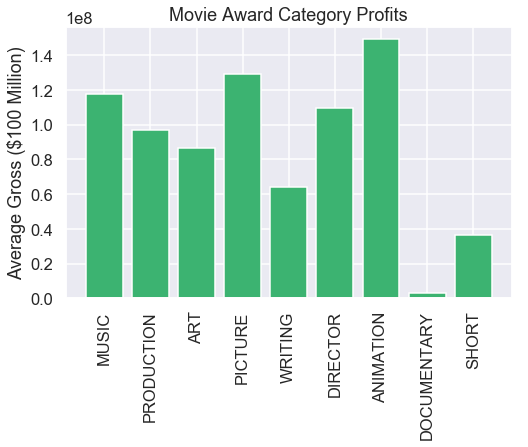

In [51]:
# Seperating each category into its own DataFrame
music_df = movie_awards_df.loc[movie_awards_df['category'] == "MUSIC"]
prod_df = movie_awards_df.loc[movie_awards_df['category'] == "PRODUCTION"]
pic_df = movie_awards_df.loc[movie_awards_df['category'] == "PICTURE"]
art_df = movie_awards_df.loc[movie_awards_df['category'] == "ART"]
writing_df = movie_awards_df.loc[movie_awards_df['category'] == "WRITING"]
dir_df = movie_awards_df.loc[movie_awards_df['category'] == "DIRECTOR"]
anim_df = movie_awards_df.loc[movie_awards_df['category'] == "ANIMATION"]
doc_df = movie_awards_df.loc[movie_awards_df['category'] == "DOCUMENTARY"]
short_df = movie_awards_df.loc[movie_awards_df['category'] == "SHORT"]

# Get average gross profits of each award category
music_gross = int(music_df['gross_usa'].sum() / len(music_df))
prod_gross = int(prod_df['gross_usa'].sum() / len(prod_df))
pic_gross = int(pic_df['gross_usa'].sum() / len(pic_df))
art_gross = int(art_df['gross_usa'].sum() / len(art_df))
writing_gross = int(writing_df['gross_usa'].sum() / len(writing_df))
dir_gross = int(dir_df['gross_usa'].sum() / len(dir_df))
anim_gross = int(anim_df['gross_usa'].sum() / len(anim_df))
doc_gross = int(doc_df['gross_usa'].sum() / len(doc_df))
short_gross = int(short_df['gross_usa'].sum() / len(short_df))
category_gross = [music_gross, prod_gross, pic_gross, art_gross, 
                  writing_gross, dir_gross, anim_gross, doc_gross, short_gross]

# Bar graph of award category gross profits
award_labels = list(movie_awards_df['category'].value_counts().index)
award_values = list(movie_awards_df['category'].value_counts().values)

plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], category_gross,
        tick_label = award_labels, width = 0.8, color="mediumseagreen")
plt.ylabel('Average Gross ($100 Million)')
plt.title('Movie Award Category Profits')
plt.xticks(rotation='vertical')

fig = plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- We can see here that although music was the highest represented category within movie awards, the gross profit of animation movies still beat it by a significant margin.

## Ethics and Privacy

For our project, there were a number of ethical considerations to explore. We have subdivided our thoughts into subtopics below:

#### Data Acquisition:

Our main datasets came from website Kaggle.com, which in turn used movie data from themoviedb.org. According to the dataset's creators the data is in accordance with the terms of service for themoviedb.org. The dataset containing the Academy Awards data came from datahub.io, which was scraped from the official Academy Awards Database (awardsdatabase.oscars.org). The terms of use for Academy Awards data had no specific details on the restrictions of its use. In terms of how these websites gathered this data is somewhat unclear, but it mainly appears to be film studios providing the data about their films for publicity and cast acknowledgements. 

#### Data Privacy Concerns:

For our datasets, most of the data is public knowledge and even displayed in the post credits of the films. There are some concerns however with the 'TMDB 5000' dataset in particular, which does in fact have a fairly detailed list of crew member names and job titles which may or may not have been public knowledge. Our project took this into account and specifically didn't use any crew members names other than the main actors, directors and writers.

#### Data Bias:

Our data is definitely skewed towards larger market films. Having only less than ten thousand movies to research, many of these films happen to the most popular movies in the past century. Many small market, international, private films were not taken into account for our project, thus our results are more biased towards more large Hollywood film productions. This means that our conclusion may not be suitable for non-English, smaller films, which potentially could have been great films. This leads us to clarify again that when we refer to “success”, it's in regards to monetary gain only, since the quality of a film is often subjective to the viewer.  An example of this can be seen in chinese or Bollywood films or even small independent budget films that reach critical acclaim. Our project is only a subset of the total amount of movies ever produced. 

#### Who Can Make Money From This?

As explained in the section above about our project bias, many small, international and private films aren't as accounted for as large famous production films. This means that our conclusions for what makes a movie successful only applies to the general movies type that we analyzed. Therefore, big budget production filmmakers and studios will receive more insight and benefits from this data compared to smaller films, which can't afford to produce large budget films with high level productions and cast members.  

## Conclusion & Discussion

#### Conclusion:

During this project, we have discovered many interesting observations about what film characteristics make certain films successful over the past century. Using information from the datasets that we pulled from, we were able to draw conclusions for each of the factors we believed would have an impact on a movie’s performance. In our original hypothesis, we believed the biggest factors for a movie’s success would be higher budgets, oscar wins and films released in the summer. This hypothesis ended up being somewhat correct, as in our budget vs revenue section, we were able to conclude that higher budgets did lead to greater revenue and late summer releases saw a spike in revenue. Awards and nominations for a movie however did not have any meaningful impact on a movie’s success. During our analysis, we also noticed that the production companies Disney and Dreamworks consistently surpassed every other company in total revenue. This lead us to investigate if there was a common theme between them which lead to their success. Both of these companies are predominantly animation companies, so once we looked into which movie genre performed the best, it was interesting to see that animation movies also held the spot for highest revenue earned. In addition to this, we were able to determine that including top actors in a movie lead it to be more successful as well. Therefore to answer our original research question, the key factors that contribute to a film’s success would be largely budget films, genre including animation and/or adventure, top list actors, and release dates in the late summer and holiday season.


In the future, if we had more time, we would have utilized decision trees and potentially machine learning algorithms to make a prediction model. Using the conclusions we have gathered from our data, an example of a movie that would have a higher likelihood of financial success would be a movie such as Disney’s upcoming film in 2019 titled <i>“Lion King”</i> which contains the key factors. The film is releasing during the summer, it is a high budget animation produced by Diseny Studios, and it is also voiced by popular top actors such as Donald Glover, Beyonce and Seth Rogan.


#### Limitations:

There were some clear limitations to our project. The main limitation was our access to movie data. We only had roughly ten thousand films after merging our datasets, which while may be a substantial amount, was clearly not close to the total amount of movies ever made. Another limitation is the rough revenue and profit estimates of many films. Since some films don't fully release their financial records, it was difficult to get a clear financial breakdown, such as the ones seen in a Wall Street earnings report. Revenue is also continuously growing for some films as movie licensing deals are being agreed to for TV and streaming services such as Netflix.  In the future it would be nice to include more films and clearer financial records so we can get a better understanding of the film industry and see what makes certain films financially successful.  



#### Impact:

The impact of this data research project may be seen specifically with the large film studio and companies. These institutions might choose to utilize this data in their future film decisions and predictions. This research could influence directors, writers, actors and actresses on which films that they create or choose to take on as employment in the future. As for many people involved in the Hollywood entertainment industry, everyone seeks monetary success and therefore this project's data might be valuable to those parties.  

### Sources:

- (1): https://en.wikipedia.org/wiki/Film_industry